# Importing libraries

In [93]:
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
import datetime as dt

# Fetching USGS historical data

In [2]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2022-09-25&endtime=2022-11-01'
json_obj = urlopen(url)
data = json.load(json_obj)
df = pd.json_normalize(data, record_path=['features'])

In [211]:
df.to_csv('machine_data.csv', index=False)

In [2]:
df = pd.read_csv('machine_data.csv')

In [3]:
df

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,ak022dz5ezb8,2.30,"63 km W of Tyonek, Alaska",1667260716194,1669607803040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.5100,NaN,ml,earthquake,"M 2.3 - 63 km W of Tyonek, Alaska",Point,"[-152.3132, 61.0899, 108.7]"
1,Feature,nn00850374,0.30,"7 km SE of Floriston, California",1667260472434,1667270651978,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",3.0,0.07900,0.0788,226.06,ml,earthquake,"M 0.3 - 7 km SE of Floriston, California",Point,"[-119.9603, 39.3451, 4.9]"
2,Feature,ak022dz5c5id,1.90,"79 km SSE of Akutan, Alaska",1667259916210,1668732379864,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.4400,NaN,ml,earthquake,"M 1.9 - 79 km SSE of Akutan, Alaska",Point,"[-165.2668, 53.4852, 40.5]"
3,Feature,us7000imi4,4.20,"111 km SSE of Pondaguitan, Philippines",1667259806755,1668493027040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",16.0,1.90900,0.4300,171.00,mb,earthquake,"M 4.2 - 111 km SSE of Pondaguitan, Philippines",Point,"[126.631, 5.4618, 67.437]"
4,Feature,hv73202792,2.01,"8 km E of P?hala, Hawaii",1667259381950,1667259569090,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",38.0,NaN,0.1200,162.00,md,earthquake,"M 2.0 - 8 km E of P?hala, Hawaii",Point,"[-155.397994995117, 19.1886672973633, 32.04999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15737,Feature,pr71372933,2.50,"2 km SSW of Guánica, Puerto Rico",1664065078460,1664065992230,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",8.0,NaN,0.1700,224.00,md,earthquake,"M 2.5 - 2 km SSW of Guánica, Puerto Rico",Point,"[-66.9141666666667, 17.948, 13.03]"
15738,Feature,ak022cb84rnj,1.50,"38 km ESE of Chenega, Alaska",1664065073596,1666720823709,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.3700,NaN,ml,earthquake,"M 1.5 - 38 km ESE of Chenega, Alaska",Point,"[-147.363, 59.9577, 19.7]"
15739,Feature,nn00847903,1.60,"58 km N of Indian Springs, Nevada",1664064640213,1664136010025,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",16.0,0.15000,0.1349,264.66,ml,earthquake,"M 1.6 - 58 km N of Indian Springs, Nevada",Point,"[-115.7666, 37.094, 8.7]"
15740,Feature,nc73785571,0.91,"8km WNW of Cobb, CA",1664064584690,1664206121946,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",nearby-cities,origin,phase-data,scitech-link,",23.0,0.01395,0.0300,54.00,md,earthquake,"M 0.9 - 8km WNW of Cobb, CA",Point,"[-122.808, 38.8405, 2.39]"


# Transforming data

In [26]:
df['properties.tsunami'].value_counts()*100/len(df)

0    99.892009
1     0.107991
Name: properties.tsunami, dtype: float64

In [3]:
df = df[['properties.time', 'properties.place', 'properties.mag', 'properties.magType', 'geometry.coordinates', 'properties.tsunami']]

df.rename(columns={'properties.time' : 'time',
                          'properties.place' : 'place',
                          'properties.mag' : 'mag',
                          'properties.magType' : 'magType',
                          'geometry.coordinates' : 'coordinates',
                          'properties.tsunami' : 'tsunami'}, inplace=True)

df_locations = pd.DataFrame(df["coordinates"].to_list(), columns=['longitude', 'latitude', 'depth'])
df['latitude'] = df_locations.latitude
df['longitude'] = df_locations.longitude
df['depth'] = df_locations.depth
df.drop(columns='coordinates', inplace=True)

df.time = pd.to_datetime(df.time, unit='ms')

## Final dataframe

In [4]:
df

,time,place,mag,magType,tsunami,latitude,longitude,depth
0,2022-10-31 23:58:36.194,"63 km W of Tyonek, Alaska",2.30,ml,0,61.089900,-152.313200,108.700000
1,2022-10-31 23:54:32.434,"7 km SE of Floriston, California",0.30,ml,0,39.345100,-119.960300,4.900000
2,2022-10-31 23:45:16.210,"79 km SSE of Akutan, Alaska",1.90,ml,0,53.485200,-165.266800,40.500000
3,2022-10-31 23:43:26.755,"111 km SSE of Pondaguitan, Philippines",4.20,mb,0,5.461800,126.631000,67.437000
4,2022-10-31 23:36:21.950,"8 km E of P?hala, Hawaii",2.01,md,0,19.188667,-155.397995,32.049999
...,...,...,...,...,...,...,...,...
15737,2022-09-25 00:17:58.460,"2 km SSW of Guánica, Puerto Rico",2.50,md,0,17.948000,-66.914167,13.030000
15738,2022-09-25 00:17:53.596,"38 km ESE of Chenega, Alaska",1.50,ml,0,59.957700,-147.363000,19.700000
15739,2022-09-25 00:10:40.213,"58 km N of Indian Springs, Nevada",1.60,ml,0,37.094000,-115.766600,8.700000
15740,2022-09-25 00:09:44.690,"8km WNW of Cobb, CA",0.91,md,0,38.840500,-122.808000,2.390000


# Fetching significant earthquake historical data

In [9]:
df_sig = pd.read_csv('Significant-Earthquake-Database.csv')

In [13]:
df_sig[df_sig['Focal Depth'].isna()] # The rows with no depth have no use for the model so we'll drop them

,ID,Date,Country,Location,Latitude,Longitude,Focal Depth,Class_Depth,Primary Magnitude,Class_Mag,Intensity,Deaths,Death Description,Damage (in M$),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Tsunami
14,5950,NaN,JAPAN,"SEIONAIKAI, JAPAN",34.60,135.40,NaN,NaN,6.7,Strong,NaN,0.0,NaN,0.50,LIMITED (roughly corresponding to less than $1...,0.0,NaN,0.0,NaN,1.0
15,6019,NaN,JAPAN,"BOSO, JAPAN",35.20,140.60,NaN,NaN,6.7,Strong,NaN,0.0,NaN,0.00,NaN,0.0,NaN,0.0,NaN,1.0
16,1176,1707-10-28,JAPAN,JAPAN: ENSHUNADA,34.10,137.80,NaN,NaN,8.4,Great,NaN,0.0,NaN,0.00,NaN,0.0,NaN,0.0,NaN,1.0
17,1730,1829-09-26,CHILE,CHILE: VALPARAISO,-33.05,-71.63,NaN,NaN,7.0,Major,11.0,9.0,Few (~1 to 50 deaths),0.50,LIMITED (roughly corresponding to less than $1...,0.0,NaN,0.0,NaN,0.0
18,10008,1868-08-14,CHILE,CHILE: ARICA,-18.60,-71.00,NaN,NaN,8.5,Great,NaN,0.0,NaN,0.00,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,1315,1751-05-20,JAPAN,JAPAN: HONSHU: NW,37.20,138.10,NaN,NaN,6.6,Strong,NaN,2100.0,Very Many (~1001 or more deaths),4900.00,EXTREME (~$25 million or more),9100.0,Very Many (~1001 or more houses),0.0,NaN,1.0
576,1566,1804-07-10,JAPAN,JAPAN: KISAKATA,39.05,139.95,NaN,NaN,7.3,Major,NaN,450.0,Many (~101 to 1000 deaths),4900.00,EXTREME (~$25 million or more),10810.0,Very Many (~1001 or more houses),0.0,NaN,1.0
577,2195,1872-03-26,USA,CALIFORNIA: OWENS VALLEY,36.70,-118.10,NaN,NaN,7.8,Major,10.0,27.0,Few (~1 to 50 deaths),0.25,LIMITED (roughly corresponding to less than $1...,52.0,Some (~51 to 100 houses),0.0,NaN,1.0
580,2534,1898-04-22,JAPAN,JAPAN: SANRIKU,38.60,142.00,NaN,NaN,7.2,Major,NaN,0.0,NaN,11.00,SEVERE (~>$5 to $24 million),402.0,Many (~101 to 1000 houses),0.0,NaN,1.0


In [14]:
no_depth = df_sig[df_sig['Focal Depth'].isna()].index
df_sig.drop(no_depth, inplace=True)

In [21]:
df_sig = df_sig[['Primary Magnitude', 'Focal Depth']]

In [24]:
df_sig.rename(columns={'Primary Magnitude' : 'mag',
                        'Focal Depth' : 'depth'}, inplace=True)

C:\Users\Auli\AppData\Local\Temp\ipykernel_3376\2435662861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sig.rename(columns={'Primary Magnitude' : 'mag',


In [25]:
df_sig

,mag,depth
0,6.6,39.0
1,6.1,7.0
2,6.0,6.0
3,6.1,9.0
4,6.3,11.0
...,...,...
589,5.3,14.0
590,6.8,39.0
591,7.6,19.0
592,8.3,22.0


# Defining features

In [15]:
df['year'] = df.time.dt.year # Creating a year feature
df['month'] = df.time.dt.month # Creating a month feature
df.drop(columns=['time', 'year'], inplace=True) 
df[['km', 'location']] = df['place'].str.split(',', 1, expand=True) # spliting the region from the aproximate location
df.location.fillna(df.km[df.km.str.contains('km') == False], inplace=True) # Filling the locations that didn't had km aproximations
no_location = df[df.location.isna()].index
df.drop(no_location, inplace=True)
df.drop(columns=['place'], inplace=True)

C:\Users\Auli\AppData\Local\Temp\ipykernel_3376\2334046914.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['km', 'location']] = df['place'].str.split(',', 1, expand=True) # spliting the region from the aproximate location


Features to use

In [16]:
df

,mag,magType,tsunami,latitude,longitude,depth,month,km,location
0,2.30,ml,0,61.089900,-152.313200,108.700000,10,63 km W of Tyonek,Alaska
1,0.30,ml,0,39.345100,-119.960300,4.900000,10,7 km SE of Floriston,California
2,1.90,ml,0,53.485200,-165.266800,40.500000,10,79 km SSE of Akutan,Alaska
3,4.20,mb,0,5.461800,126.631000,67.437000,10,111 km SSE of Pondaguitan,Philippines
4,2.01,md,0,19.188667,-155.397995,32.049999,10,8 km E of P?hala,Hawaii
...,...,...,...,...,...,...,...,...,...
15737,2.50,md,0,17.948000,-66.914167,13.030000,9,2 km SSW of Guánica,Puerto Rico
15738,1.50,ml,0,59.957700,-147.363000,19.700000,9,38 km ESE of Chenega,Alaska
15739,1.60,ml,0,37.094000,-115.766600,8.700000,9,58 km N of Indian Springs,Nevada
15740,0.91,md,0,38.840500,-122.808000,2.390000,9,8km WNW of Cobb,CA


In [17]:
df.location.replace(' ', '', inplace=True)
df.location.replace(' CA', 'California', inplace=True)
df.location.fillna(df.km[df.km.str.contains('km') == False], inplace=True)
no_location = df[df.location.isna()].index
df.drop(no_location, inplace=True)

In [152]:
df.location.isna().sum()*100/len(df)

0.0

In [18]:
df.drop(columns=['km', 'magType'], inplace=True)

In [26]:
df = df[['mag', 'depth']]

In [28]:
df.depth = round(df.depth,1)

C:\Users\Auli\AppData\Local\Temp\ipykernel_3376\2928120922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.depth = round(df.depth,1)


In [29]:
df

,mag,depth
0,2.30,108.7
1,0.30,4.9
2,1.90,40.5
3,4.20,67.4
4,2.01,32.0
...,...,...
15737,2.50,13.0
15738,1.50,19.7
15739,1.60,8.7
15740,0.91,2.4


In [32]:
df_merged = df.append(df_sig, ignore_index=True)

C:\Users\Auli\AppData\Local\Temp\ipykernel_3376\2218702514.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = df.append(df_sig, ignore_index=True)


In [35]:
df_merged

,mag,depth
0,2.30,108.7
1,0.30,4.9
2,1.90,40.5
3,4.20,67.4
4,2.01,32.0
...,...,...
15712,5.30,14.0
15713,6.80,39.0
15714,7.60,19.0
15715,8.30,22.0


## Upsampling minority class

In [158]:
df[df.tsunami == 0]

,mag,magType,tsunami,latitude,longitude,depth,month,km,location
0,2.30,ml,0,61.089900,-152.313200,108.700000,10,63 km W of Tyonek,Alaska
1,0.30,ml,0,39.345100,-119.960300,4.900000,10,7 km SE of Floriston,California
2,1.90,ml,0,53.485200,-165.266800,40.500000,10,79 km SSE of Akutan,Alaska
3,4.20,mb,0,5.461800,126.631000,67.437000,10,111 km SSE of Pondaguitan,Philippines
4,2.01,md,0,19.188667,-155.397995,32.049999,10,8 km E of P?hala,Hawaii
...,...,...,...,...,...,...,...,...,...
15737,2.50,md,0,17.948000,-66.914167,13.030000,9,2 km SSW of Guánica,Puerto Rico
15738,1.50,ml,0,59.957700,-147.363000,19.700000,9,38 km ESE of Chenega,Alaska
15739,1.60,ml,0,37.094000,-115.766600,8.700000,9,58 km N of Indian Springs,Nevada
15740,0.91,md,0,38.840500,-122.808000,2.390000,9,8km WNW of Cobb,California


In [236]:
from sklearn.utils import resample

df = df[df.tsunami == 0]


df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=15291,  # to match majority class
                                 random_state=123) # reproducible results

df = pd.concat([df, df_minority_upsampled])

In [221]:
df.tsunami.value_counts()

0    15293
1    15291
Name: tsunami, dtype: int64

# Machine learning process

Importing libraries

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder

Preprocessing

In [38]:
df_merged.isna().sum()*100/len(df_merged) # There are missing values in the mag and magType fields

mag      0.006363
depth    0.000000
dtype: float64

In [183]:
df[df.mag.isna()] # Since there is one entry, we'll drop it

,mag,magType,tsunami,latitude,longitude,depth,month,km,location
9410,NaN,None,0,17.950333,-66.923833,10.9,10,2 km SW of Guánica,Puerto Rico


In [39]:
no_mag = df_merged[df_merged.mag.isna()].index
df_merged.drop(no_mag, inplace=True)

In [185]:
df.dtypes # We should encode the objects values

mag          float64
magType       object
tsunami        int64
latitude     float64
longitude    float64
depth        float64
month          int64
km            object
location      object
dtype: object

In [223]:
#mappings = []

#encoder = LabelEncoder()

#for column in range(len(df.columns)):
#    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
#    mappings_dict = {index : label for index, label in enumerate(encoder.classes_)}
#    mappings.append(mappings_dict)

In [16]:
mappings_magtype = []

encoder = LabelEncoder()

df.magType = encoder.fit_transform(df.magType)
mappings_dict = {index : label for index, label in enumerate(encoder.classes_)}
mappings_magtype.append(mappings_dict)

In [17]:
mappings_location = []

encoder = LabelEncoder()

df.location = encoder.fit_transform(df.location)
mappings_dict = {index : label for index, label in enumerate(encoder.classes_)}
mappings_location.append(mappings_dict)

In [364]:
mappings_location

[{0: ' Afghanistan',
  1: ' Alaska',
  2: ' Alaska region',
  3: ' Alaska, Alaska',
  4: ' Aleutian Islands, Alaska',
  5: ' American Samoa',
  6: ' Anguilla',
  7: ' Antigua and Barbuda',
  8: ' Argentina',
  9: ' Arizona',
  10: ' Arkansas',
  11: ' Australia',
  12: ' Azerbaijan',
  13: ' B.C., MX',
  14: ' Bolivia',
  15: ' Bonaire, Saint Eustatius and Saba ',
  16: ' California',
  17: ' Canada',
  18: ' Canada region',
  19: ' Chile',
  20: ' China',
  21: ' Colombia',
  22: ' Colorado',
  23: ' Costa Rica',
  24: ' Democratic Republic of the Congo',
  25: ' Dominican Republic',
  26: ' Ecuador',
  27: ' El Salvador',
  28: ' Fiji',
  29: ' France',
  30: ' Georgia',
  31: ' Germany',
  32: ' Greece',
  33: ' Grenada',
  34: ' Guam',
  35: ' Guatemala',
  36: ' Hawaii',
  37: ' Honduras',
  38: ' Iceland',
  39: ' Idaho',
  40: ' India',
  41: ' India region',
  42: ' Indonesia',
  43: ' Iran',
  44: ' Italy',
  45: ' Japan',
  46: ' Japan region',
  47: ' Kansas',
  48: ' Kazakh

In [18]:
df

,mag,magType,tsunami,latitude,longitude,depth,month,location
0,2.30,4,0,61.089900,-152.313200,108.700000,10,1
1,0.30,4,0,39.345100,-119.960300,4.900000,10,16
2,1.90,4,0,53.485200,-165.266800,40.500000,10,1
3,4.20,0,0,5.461800,126.631000,67.437000,10,77
4,2.01,2,0,19.188667,-155.397995,32.049999,10,36
...,...,...,...,...,...,...,...,...
15737,2.50,2,0,17.948000,-66.914167,13.030000,9,78
15738,1.50,4,0,59.957700,-147.363000,19.700000,9,1
15739,1.60,4,0,37.094000,-115.766600,8.700000,9,62
15740,0.91,2,0,38.840500,-122.808000,2.390000,9,113


In [40]:
X = df_merged

In [41]:
X

,mag,depth
0,2.30,108.7
1,0.30,4.9
2,1.90,40.5
3,4.20,67.4
4,2.01,32.0
...,...,...
15712,5.30,14.0
15713,6.80,39.0
15714,7.60,19.0
15715,8.30,22.0


In [42]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [43]:
X

,mag,depth
0,0.361498,1.621613
1,-1.004070,-0.394213
2,0.088385,0.297149
3,1.658788,0.819555
4,0.163491,0.132077
...,...,...
15711,2.409850,-0.217488
15712,3.434027,0.268019
15713,3.980254,-0.120387
15714,4.458203,-0.062126


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Clustering

In [140]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [126]:
clusters = kmeans.predict(X)
clusters

array([3, 0, 0, ..., 2, 2, 2])

Visualization

In [127]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])
reduced_X

,PC1,PC2
0,1.402271,0.891035
1,-0.988735,0.431234
2,0.272614,0.147619
3,1.752453,-0.593427
4,0.208998,-0.022213
...,...,...
15711,1.550234,-1.857809
15712,2.617741,-2.238705
15713,2.729338,-2.899591
15714,3.108496,-3.196355


In [128]:
reduced_X['cluster'] = clusters
reduced_X

,PC1,PC2,cluster
0,1.402271,0.891035,3
1,-0.988735,0.431234,0
2,0.272614,0.147619,0
3,1.752453,-0.593427,2
4,0.208998,-0.022213,0
...,...,...,...
15711,1.550234,-1.857809,2
15712,2.617741,-2.238705,2
15713,2.729338,-2.899591,2
15714,3.108496,-3.196355,2


In [48]:
import matplotlib.pyplot as plt

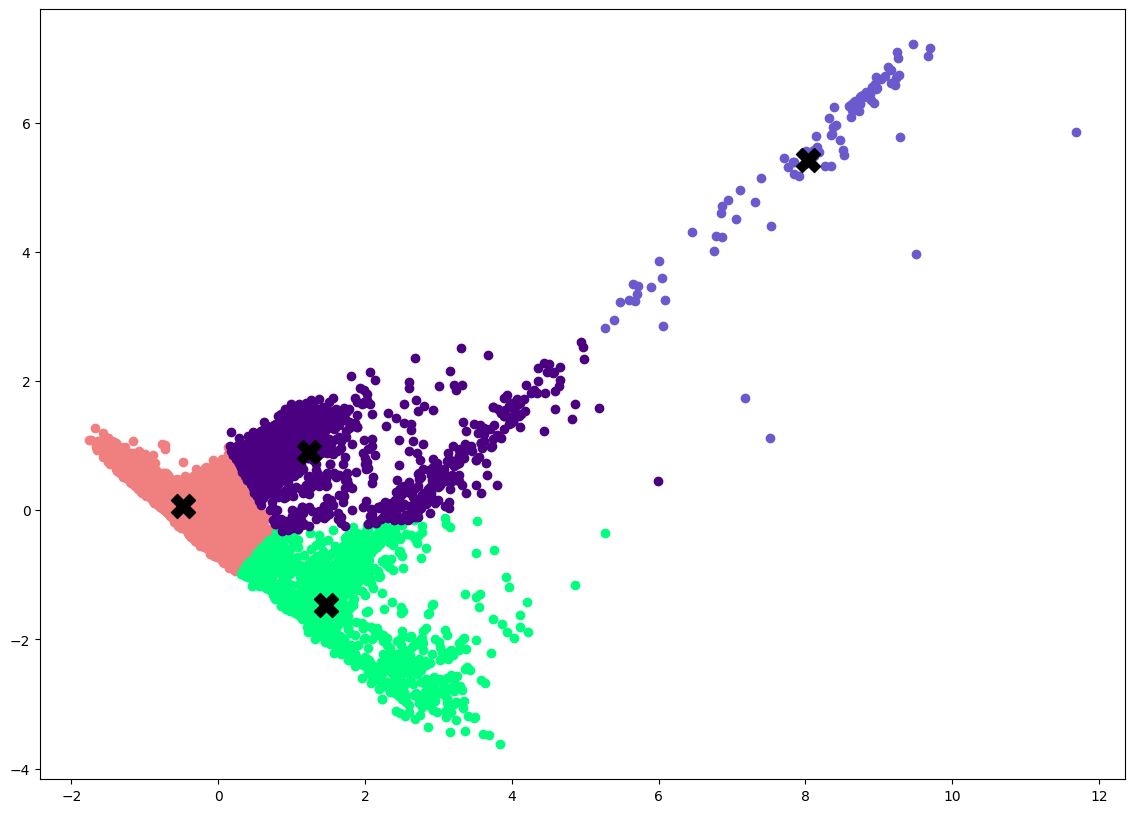

In [130]:
plt.figure(figsize=(14,10))

#plt.scatter(reduced_X.PC1, reduced_X.PC2)

plt.scatter(reduced_X[reduced_X.cluster == 1].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 1].loc[:, 'PC2'], color='slateblue')
plt.scatter(reduced_X[reduced_X.cluster == 0].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 0].loc[:, 'PC2'], color='lightcoral')
plt.scatter(reduced_X[reduced_X.cluster == 2].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 2].loc[:, 'PC2'], color='springgreen')
plt.scatter(reduced_X[reduced_X.cluster == 3].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 3].loc[:, 'PC2'], color='indigo')
#plt.scatter(reduced_X[reduced_X.cluster == 4].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 4].loc[:, 'PC2'], color='teal')
#plt.scatter(reduced_X[reduced_X.cluster == 5].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 5].loc[:, 'PC2'], color='red')


plt.scatter(reduced_centers[:,0], reduced_centers[:,1], color='black', marker='X', s=300)

plt.show()

In [129]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

c:\Users\Auli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-0.47401365,  0.06797152],
       [ 8.04215592,  5.42590667],
       [ 1.47359422, -1.46349844],
       [ 1.24057813,  0.89552386]])

In [139]:
kmeans.inertia_

18766.112566573338

In [52]:
k_rng = range(1,5)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

In [53]:
sse

[31432.000000000025, 18766.110166181847, 11216.043980427736, 7469.202331294893]

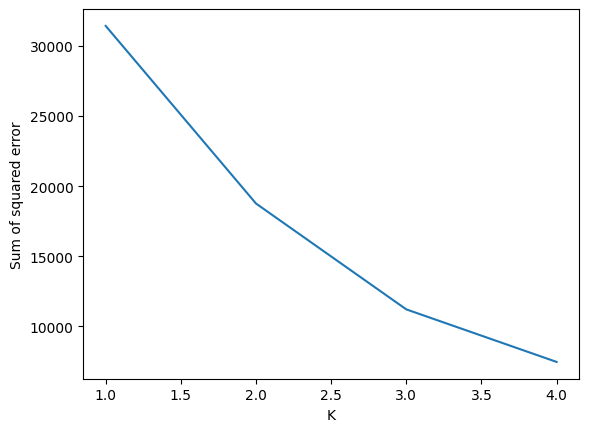

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

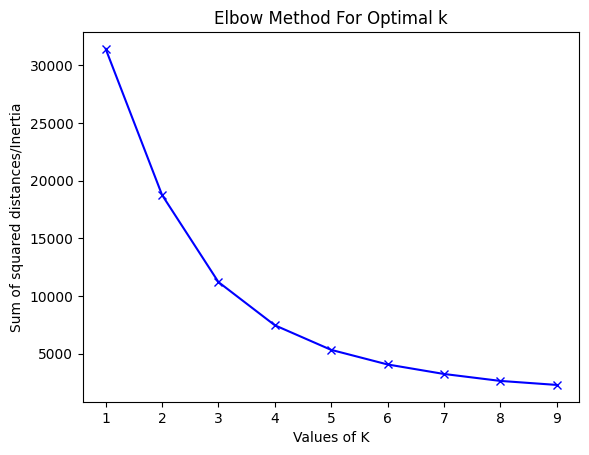

In [55]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

Saving model to see it perform with real time data

In [362]:
import joblib

joblib.dump(kmeans, 'KMeans_ertq')

['KMeans_ertq']

In [132]:
df_merged['cluster'] = reduced_X.cluster

In [133]:
df_merged

,mag,depth,cluster
0,2.30,108.7,3.0
1,0.30,4.9,0.0
2,1.90,40.5,0.0
3,4.20,67.4,2.0
4,2.01,32.0,0.0
...,...,...,...
15712,5.30,14.0,2.0
15713,6.80,39.0,2.0
15714,7.60,19.0,2.0
15715,8.30,22.0,2.0


In [134]:
print(f'0.0 cluster - Max mag: {df_merged[df_merged.cluster == 0.0].mag.max()}, min mag: {df_merged[df_merged.cluster == 0.0].mag.min()}')
print(f'1.0 cluster - Max mag: {df_merged[df_merged.cluster == 1.0].mag.max()}, min mag: {df_merged[df_merged.cluster == 1.0].mag.min()}')
print(f'2.0 cluster - Max mag: {df_merged[df_merged.cluster == 2.0].mag.max()}, min mag: {df_merged[df_merged.cluster == 2.0].mag.min()}')
print(f'3.0 cluster - Max mag: {df_merged[df_merged.cluster == 3.0].mag.max()}, min mag: {df_merged[df_merged.cluster == 3.0].mag.min()}')
#print(f'4.0 cluster - Max mag: {df_merged[df_merged.cluster == 4.0].mag.max()}, min mag: {df_merged[df_merged.cluster == 4.0].mag.min()}')
#print(f'5.0 cluster - Max mag: {df_merged[df_merged.cluster == 5.0].mag.max()}, min mag: {df_merged[df_merged.cluster == 5.0].mag.min()}')

0.0 cluster - Max mag: 6.5, min mag: -1.29
1.0 cluster - Max mag: 8.2, min mag: -0.36
2.0 cluster - Max mag: 9.5, min mag: -0.97
3.0 cluster - Max mag: 5.8, min mag: -1.1


# Checking number of clusters

In [90]:
from sklearn.metrics import silhouette_score

In [135]:
silhouette_score(X, kmeans.labels_)

0.6139017034610436

Creting list to see scores with different cluster number

In [99]:
k_means_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,7)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in k_means_per_k[1:]]

silhouette_scores

[0.6461451657988082,
 0.6358647215872743,
 0.6138680519322963,
 0.46480525611602524,
 0.4889148427988833]

Plotting silhouette scores

In [95]:
from pylab import rcParams

C:\Users\Auli\AppData\Local\Temp\ipykernel_3376\3024952676.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,7), silhouette_scores, 'bo-', color='blue',


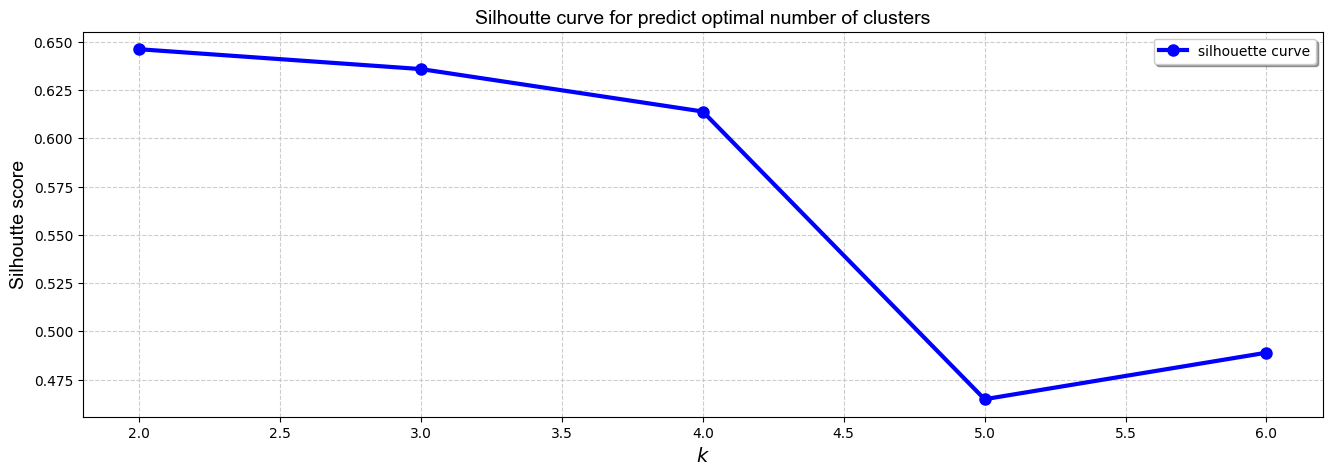

In [136]:
rcParams['figure.figsize'] = 16,5
plt.plot(range(2,7), silhouette_scores, 'bo-', color='blue',
linewidth=3, markersize=8, label='silhouette curve')
plt.xlabel('$k$', fontsize=14, family='Arial')
plt.ylabel('Silhoutte score', fontsize=14, family='Arial')
plt.grid(which='major', color='#cccccc', linestyle='--')

plt.title('Silhoutte curve for predict optimal number of clusters', family='Arial', fontsize=14)

k = np.argmax(silhouette_scores) * 2

plt.legend(shadow=True)

plt.show()